In [85]:
import pandas as pd

In [86]:
df = pd.read_csv('emails.csv')

In [87]:
df.shape

(5172, 3002)

In [88]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [89]:
X = df.drop(['Email No.','Prediction'], axis = 1)
Y = df['Prediction']

<Axes: xlabel='Prediction', ylabel='count'>

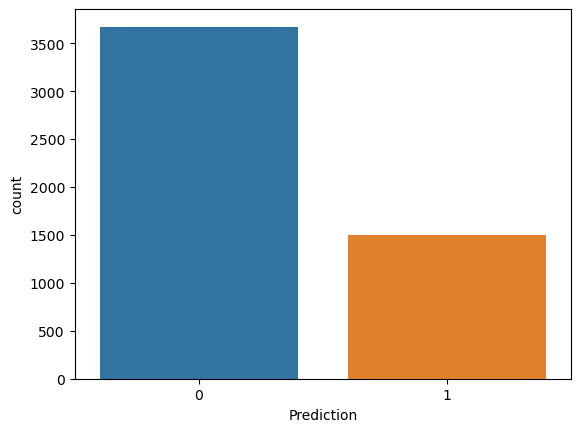

In [90]:
import seaborn as sns
sns.countplot(x = Y)

In [91]:
Y.value_counts()

Prediction
0    3672
1    1500
Name: count, dtype: int64

In [92]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [93]:
X_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03809524, 0.09848485, 0.06705539, ..., 0.        , 0.00877193,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00952381, 0.0530303 , 0.        , ..., 0.        , 0.00877193,
        0.        ],
       [0.1047619 , 0.18181818, 0.01166181, ..., 0.        , 0.        ,
        0.        ]])

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state = 0, test_size = 0.25)

In [95]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

In [96]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [97]:
Y_pred = knn.predict(X_test)

In [98]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [99]:
print("KNN Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

KNN Confusion Matrix:
 [[783 146]
 [ 20 344]]


In [100]:
accuracy_score(Y_test, Y_pred)

0.871616395978345

In [101]:
print("KNN Classification Report:")
print(classification_report(Y_test, Y_pred))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.84      0.90       929
           1       0.70      0.95      0.81       364

    accuracy                           0.87      1293
   macro avg       0.84      0.89      0.85      1293
weighted avg       0.90      0.87      0.88      1293



In [102]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear')
# 0.954369682907966
# svm = SVC(kernel = 'poly')
#0.7540603248259861
# svm = SVC(kernel = 'rbf')
#0.7996906419180201
# svm = SVC(kernel = 'sigmoid')
#0.5978344934261408

In [103]:
svm.fit(X_train, Y_train)

SVC(kernel='linear')

In [104]:
Y_pred = svm.predict(X_test)

In [105]:
accuracy_score(Y_pred, Y_test)

0.9767981438515081